# Covid19 Datavisualizations

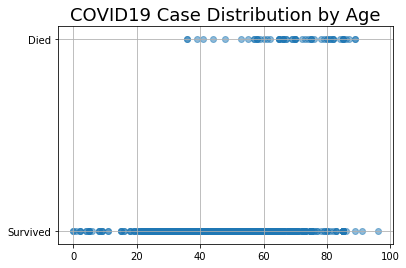

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv("covid19_line_list_data.csv")

data 

data = data [["death", "age"]].dropna() # clean up eliminate null number
data["age"] = data["age"].astype(int) # clean up making it an integer



# !!!! It is necessary  to create a list before making a plot!!!1
# create list of death and age 
death = data.death.tolist()
age = data.age.tolist()
#print(death) # testing

# initialize array
binarydeaths = []

#
for vals in death:
    if vals == '0':
        binarydeaths.append(0)  # alive [0]
    else:
        binarydeaths.append(1)  # death [1]

        

                
#print(binarydeaths)   #testing     
# data.head(15) #viewing


# Plot a scatterplot of age vs. death
plt.scatter(age,binarydeaths, alpha = 0.5)

plt.grid(b=True) # shows vertical grid line
plt.title('COVID19 Case Distribution by Age', fontsize=18)
plt.yticks([0,1],['Survived','Died']) # gives tick and is able to name it
plt.show() # shows plot

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   death   843 non-null    object
 1   age     843 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 16.5+ KB


In [27]:
# Convert the death column into an integer.
data["death"] = data["death"].astype(int) # clean up making it an integer

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   death   843 non-null    int32
 1   age     843 non-null    int32
dtypes: int32(2)
memory usage: 13.2 KB


In [6]:
# Convert the death column into an integer.
#data['death'] = data['death'].apply(lambda cell: 0 if cell == '0' else 1) # works but to complicated for me

In [29]:
#data.info()

In [30]:
data.head()

,death,age
0,1,66
1,1,56
2,1,46
3,1,60
4,1,58


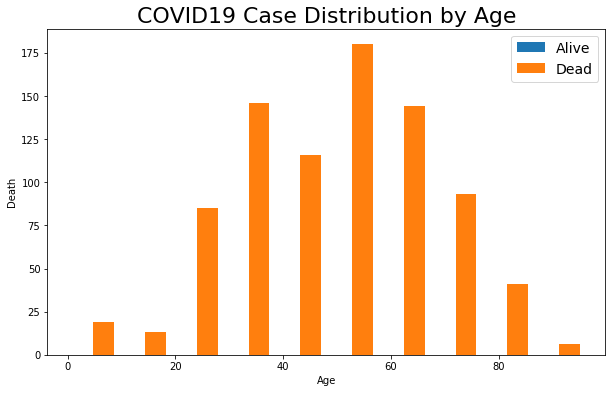

In [32]:
# attention numpy had to blocked out, there seems to be a conflict
# plot surviors versa non_survivors, binned in 10 year age intervals

death = data[data.death == 1] # extract death by age
alive = data[data.death == 0] # extract alive by age


death_age = death.age
alive_age = alive.age

# make a  histogram
counts, binedges,thePlt= plt.hist([alive_age, death_age], bins=10, label = ['Alive', 'Dead'])

# label histogram
plt.xlabel('Age')
plt.ylabel('Death')
plt.title('COVID19 Case Distribution by Age', fontsize = 22)
plt.legend( fontsize =14)
plt.gcf().set_size_inches(10,6)
plt.show()

In [11]:
counts

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 19.,  13.,  85., 146., 116., 180., 144.,  93.,  41.,   6.])]

In [12]:
binedges

array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ])

In [13]:
len(counts), len(binedges)

(2, 11)

In [14]:
(binedges[:-1] + binedges[1:])/2

array([ 4.8, 14.4, 24. , 33.6, 43.2, 52.8, 62.4, 72. , 81.6, 91.2])

In [34]:
bincenters=(binedges[:-1]+binedges[1:])/2

ValueError: x and y must have same first dimension, but have shapes (10,) and (2, 10)

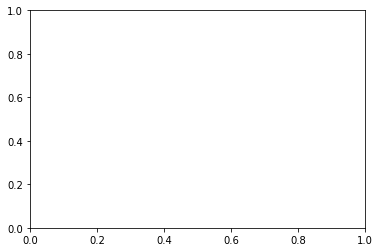

In [48]:
# 2. version

import matplotlib.pyplot as plt
import numpy as np

plt.plot(bincenters, counts)
plt.scatter(bincenters,counts,
            bins = np.linspace(0,100,10), s=counts*40,
           color="red",facecolor="lightseagreen")
plt.grid()
plt.ylabel("Number of Students")
plt.xlabel("SAT Score")

plt.gcf().set_size_inches(10,6)



#make it pretty
#plt.legend()
#plt.title('COVID19 Case Distribution by Age', fontsize=fontsize)
#plt.gcf().set_size_inches(18, 6)
plt.show()

TypeError: float() argument must be a string or a number, not 'Rectangle'

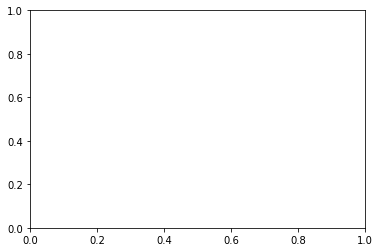

In [20]:
#my version
n_bin = 10
aliveAgeHist = thePlt[1][-n_bin : ]
deathAgeHist = thePlt[1][-n_bin : ]
aliveNumHist = thePlt[0][0]
aliveAgeHist = thePlt[0][1]
prop_rate = 8


# Make a scatter plot of age vs death
plt.scatter(x=aliveAgeHist, y=n_bin, s= aliveAgeHist, label='alive', alpha=.5)
plt.scatter(x=deathAgeHist, y=n_bin, s=aliveAgeHist, label='death', alpha=.5)
#plt.xlabel('age', fontsize=fontsize)
plt.yticks([])


In [ ]:
# Tuan Version
# Extract the ages of alive and death cases from the histogram
alive_age_hist = histogram_out[1][-n_bin : ]
death_age_hist = histogram_out[1][-n_bin : ]
alive_num_hist = histogram_out[0][0]
death_num_hist = histogram_out[0][1]
prop_rate = 8
n_bin = 10

# Make a scatter plot of age vs death
plt.scatter(x=alive_age_hist, y=n_bin * [0], s=prop_rate * alive_num_hist, label='alive', alpha=.5)
plt.scatter(x=death_age_hist, y=n_bin * [1], s=prop_rate * death_num_hist, label='death', alpha=.5)
plt.xlabel('age', fontsize=fontsize)
plt.yticks([])
plt.legend(loc='upper left')
plt.title('COVID19 Case Distribution by Age', fontsize=fontsize)
plt.gcf().set_size_inches(18, 6)
plt.show()

In [ ]:
 # Repeat scatterplot with size of dots being cases in 10-year age span
survived = np.concatenate((thePlt[0][0], np.array([0])))*3
died = np.concatenate((thePlt[0][1], np.array([0])))*3
plt.scatter(thePlt[1], np.array([0]*11), s=survived)
plt.scatter(thePlt[1], np.array([0.5]*11), s=died)
plt.yticks([0,0.5],['Survived','Died'])
plt.tight_layout()
plt.show()

In [ ]:
# attention numpy had to blocked out, there seems to be a conflict
# plot surviors versa non_survivors, binned in 10 year age intervals

death = data[data.death == 1] # extract death by age
alive = data[data.death == 0] # extract alive by age


death_age = death.age
alive_age = alive.age

# make a  histogram
counts, binedges,thePlt= plt.hist([alive_age, death_age], bins=10, label = ['Alive', 'Dead'])

binlist = np.c_[bins[:-1],bins[1:]]
d = np.array(data)
for i in range(len(binlist)):
    if i == len(binlist)-1:
        l = d[(d >= binlist[i,0]) & (d <= binlist[i,1])]
    else:
        l = d[(d >= binlist[i,0]) & (d < binlist[i,1])]
    print(l)

plt.show()

[1. 2. 2.]
[3. 4.]
[5.]
[7.]
[7.5 9.  8.  9. ]


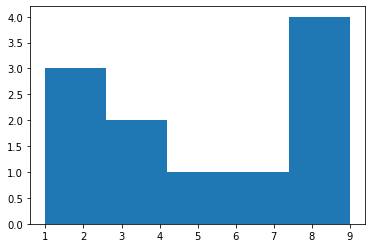

In [45]:
data=[1,2,2,3,4,5,7,7.5,9,8,9]
n,bins,patches= plt.hist(data,bins=5)


binlist = np.c_[bins[:-1],bins[1:]]
d = np.array(data)
for i in range(len(binlist)):
    if i == len(binlist)-1:
        l = d[(d >= binlist[i,0]) & (d <= binlist[i,1])]
    else:
        l = d[(d >= binlist[i,0]) & (d < binlist[i,1])]
    print(l)

plt.show()

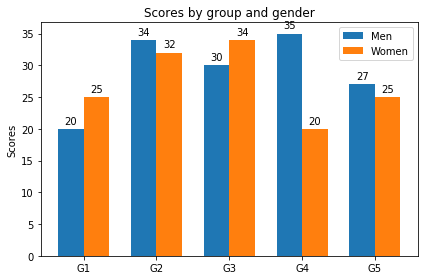

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

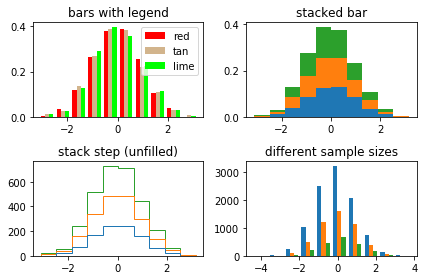

In [43]:
import numpy as np
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

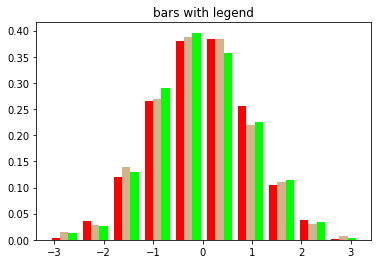

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

#fig, axes = plt.subplots()


colors = ['red', 'tan', 'lime']
plt.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)

plt.title('bars with legend')


plt.show()